## Classificação de Sistemas 
por: Iury Coelho

Este notebook tem o proposito de analisar, através da programação em python, a classificação de sistemas e resposta ao impulso.

Classificação de sinais:

* [Linearidade](#1.Linearidade)
* [Causalidade](#2.Casualidade)
* [Memória](#3.Memória)
* [Invariancia](#4.Invariancia)


Reposta ao impulso:

* [Convolução](#Convolução)

Funções em Python:

* [verifyLinearity](#função_verifyLinearity)
* [verifyCasuality](#função_verifyCasuality)
* [verifyMemory](#função_verifyMemory)
* [verifyInvariance](#função_verifyInvariance)





## 1.Linearidade

> __Definição__ 

> De acordo com Lathi, um sistema linear é aquele cuja saída seja proporcional a sua enrada e também possui a propriedade aditiva e dessa forma, o efeito total de um sinal de resposta é igual a soma de todas as componentes de efeito.  

> __Sistemas lineares e o princípio da superposição__


> - se um sistema é linear ele obedece o princípio da superposição;
> - analise que a saída de um sistema com entrada $x1$ seja igual a um sinal $y1$;
> - analise que a saída de um sistema com entrada $x2$ seja igual a um sinal $y2$;
> - se o principio da superposição for satisfeito temos que :
> - $k1x1 + k2x2 \to\ k1y1+ k2y2$;
> - onde $k1$ e $k2$ seja um valor constante;

> __Propriedades de um sistema linear__

> - a superposição possui duas propriedades;
> - a homogeneidade ou escalonamento e a aditividade;
> - homegeneidade: $x \to\ y$  temos $kx \to\ ky$;  
> - aditividade:  $x1 \to\ y1$ e $x2 \to\ y2$ temos $x1 + x2 \to\ y1 + y2$


### 1.2. Verificando a linearidade de sistemas com python

> Pseudocódigo
- importe os módulos necessários
- uma função linear pode ser representada como combinação linear de funções periódicas
- defina duas funções periódicas
- defina a combinação linear das duas funções como 'out'
- construa a função verificação
- entre com o valor da função teste 
- verifique a condição de superposição
- exiba o resultado 

In [32]:
#importando os módulos necessários

import IPython
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
import soundfile as sf
%matplotlib inline

In [4]:
# definindo funções periódicas

t = np.linspace(-20, 20, 1000) #gere o vetor que irá representar o espaço de tempo t (inicio, fim, numero de pontos)
x1 = lambda t: np.cos(t) #função cos(t)
x2 = lambda t:  np.sin(t*np.pi/2)  #função sen(t*pi/2)
out = lambda t: x1(t) + x2(t) #propriedade aditiva com as duas funções periódicas

#### função_verifyLinearity


In [148]:
#construa a função verificação

def verifyLinearity(Tr,t,out,title:''):
    
    resultado = np.array_equal(Tr(out)(t), Tr(x1)(t) + Tr(x2)(t))
    plt.plot(t, Tr(out)(t),'k--', lw=3,  label=r'$Tr{\{x_1(t)+x_2(t)\}}$')
    plt.plot(t, Tr(x1)(t)+Tr(x2)(t), color='r', label=r'$Tr{\{x_1(t)} + Tr{x_2(t)\}}$')  
    plt.grid()
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.title(title) 
    plt.legend()
    plt.plot(t, Tr(x1)(t), label=r'$Tr\{x_1(t)\}$')
    plt.plot(t, Tr(x2)(t), label='$Tr\{x_2(t)\}$')
    
    if resultado == 1:
        return print ("é linear")
    else:
        return print ("não é linear")


__Exercício__
- Oppenheim 1.2 letra e) verifique se o sinal $y(t) = x(t/3)$ é linear ou não.

é linear


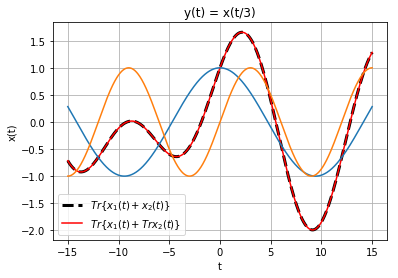

In [167]:
# testando a função de verificação

def Tr(x):
    return lambda t: x(t/3)

verifyLinearity(Tr,t,out,'y(t) = x(t/3)')

__resposta__ : como podemos ver pelo gráfico, a resposta do sinal y(t) = x(t/3) obedece o princípio da superposição e claramente o sistema é linear

- verifique se o sinal y(t) = 2*x(t) + 1 é linear ou não

não é linear


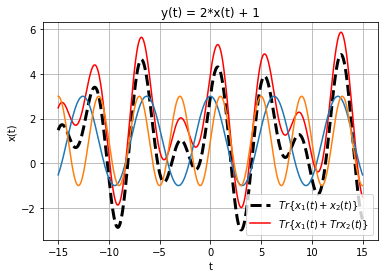

In [168]:
# testando a função de verificação

def Tr(x):
    return lambda t: 2*x(t) + 1

verifyLinearity(Tr,t,out,'y(t) = 2*x(t) + 1')

### 2.Casualidade

> __Definição__ 

> Um sistema é dito casual quando sua resposta depende, em qualquer instante, unicamente de valores presentes ou passados de tempo.

### 2.1. Verificando a causalidade de sistemas com python

> Pseudocódigo
-  analise o sistema em um tempo específico. 
-  se a saída do sistema depender de uma parcela de tempo com t maior que o tempo atual então o sistema é causal
-  se não é não causal

#### função_verifyCasuality

In [91]:
t = np.linspace(-15, 15, 1000)
x = lambda t: (t>=0).astype(float)

def verifyCausality(Tr1, title:''):    
    """ 
    Esta função verifica se um sistema é causal ou não a partir de um sinal de um tempo referencia t. 
    se a saída do sistema depender de uma parcela de tempo com t maior que o tempo atual então o sistema é causal
    se não, é não causal. 
    Entre com um sinal Tr1 e verifique a casualidade. 
    você também pode definir um título
    contendo o sinal que está sendo analisado. 
    Ex: verifyCausality(Tr1,'y(t)=x(t)+x(t+1)')
    """
    
    inputX = Tr1(x)(t) # entrada do sinal no tempo t(x)
    t1 = 0 # tempo 1 igual a zero
    t2 = 0 # tempo 2 igual a zero 
    inputN = len(inputX) # numero de termos da entrada
    
    for i in range(inputN):
        if inputX[i] == 0:
            t1 += 1
        else:
            t2 += 1
            
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.plot(t, Tr1(x)(t), label=r'Saída do sinal $y(t)=Tr\{x(t)\}$')
    plt.plot(t, x(t), label='Entrada do sinal $x(t)$')
    plt.grid()
    plt.xlabel('t')
    plt.ylabel('x(t)')   
    plt.title(title) 
    plt.legend()
        
    if t1 >= t2:
        return print('é causal')
    else:
        
        return print ('não causal', )

__Exercício__
- verifique se o sinal $x(t) + x(t+1)$ é causal ou não.

não causal


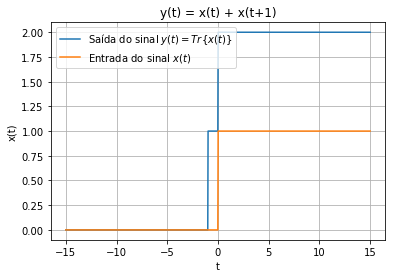

In [173]:
def Tr1(x):
    return lambda t: x(t) + x(t+1)

verifyCausality(Tr1,'y(t) = x(t) + x(t+1)')

- Lathi 1.7-7) letra a) verifique se o sinal $y(t) = x(t-2)$ é causal ou não.

é causal


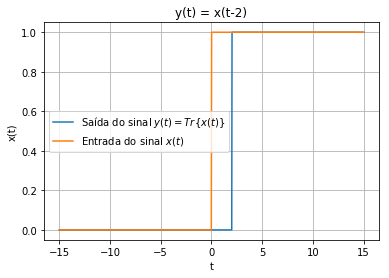

In [174]:
def Tr1(x):
    return lambda t: x(t-2)

verifyCausality(Tr1,'y(t) = x(t-2)')

__resposta__: o sistema é claramente causal pois a saida do sinal depende de uma

### 3.Memória

> __Definição__ 

> - Um sistema possui memória quando sua saída depende de valores de t passados e/ou futuros de uma entrada x(t);
> - Caso a saída dependa exclusivamente de valores de t que represente o presente, dizemos que o sistema não possui memória;
> - Para verificarmos que um sistema possui ou não, procedemos com o mesmo método feito para sistemas causais.

#### função_verifyMemory

In [93]:

def hasMemory(Tr1, title:''):    
    """ 
    Esta função verifica se um sistema tem memoria  ou não a partir de um sinal de um tempo referencia t. 
    Ex: verifyMemory(Tr1,'y(t)=x(t)+x(t+1)')
    """
    
    inputX = Tr1(x)(t) # entrada do sinal no tempo t(x)
    t1 = 0 # tempo 1 igual a zero
    t2 = 0 # tempo 2 igual a zero 
    inputN = len(inputX) # numero de termos da entrada
    
    for i in range(inputN):
        if inputX[i] == 0:
            t1 += 1
        else:
            t2 += 1
            
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.plot(t, Tr1(x)(t), label=r'Saída do sinal $y(t)=Tr\{x(t)\}$')
    plt.plot(t, x(t), label='Entrada do sinal $x(t)$')
    plt.grid()
    plt.xlabel('t')
    plt.ylabel('x(t)')   
    plt.title(title) 
    plt.legend()
    
    if t1 == t2:      
        return print('tem memória')
    
    else :
        
        return print('não tem memória')       
   

tem memória


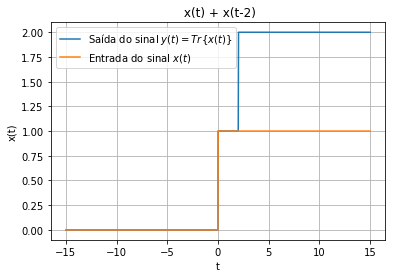

In [88]:
t = np.linspace(-15, 15, 1000)
x = lambda t: (t>=0).astype(float)

def Tr1(x):
    return lambda t: x(t) + x(t-2)

verifyMemory(Tr1,' x(t) + x(t-2)')

__Resposta:__ Podemos obeservar que o sistema tem memória, pois a saída depende de valores do passado em $x(t-2)$.

não tem memória


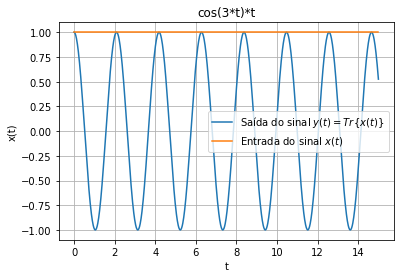

In [90]:
t = np.linspace(0, 15, 1000)
x = lambda t: (t>=0).astype(float)

def Tr1(x):
    return lambda t: np.cos(3*t)*x(t)

hasMemory(Tr1,'cos(3*t)*t')

__Resposta:__ Podemos obeservar que o sistema não tem memória, pois depende unicamente de  valores do presente.

### 4.Invariancia 

> __Definição__ 

> - Um sistema invariante no tempo não muda suas caracteristicas durante o tempo ao qual o sinal é observado;
> - Isso quer dizer que um atraso ou adiantamento aplicado na entrada irá repercurtir também na saída

#### função_verifyInvariance

In [7]:

def verifyInvariance(Tr, title=''):
    
    
    out = lambda t: x(t) + 10
    resultado = np.array_equal(Tr(out)(t),Tr(x)(t)+10)
    plt.subplot(121)    
    plt.plot(t, x(t))
    plt.plot(t, x(t-5))
    plt.plot(t, x(t-10))
    plt.grid()
    plt.xlabel('t')
    plt.ylabel('x(t)')   
    plt.title(title)    
    
        
    plt.subplot(122)
    t1 = Tr(x)
    t2 = Tr(lambda t: x(t-10))
    t3 = Tr(lambda t: x(t-5))    
    plt.plot(t, t1(t))
    plt.plot(t, t2(t))
    plt.plot(t, t3(t))    
    plt.grid()
    plt.xlabel('t')
    plt.ylabel('x(t)')   
    plt.title(title) 
    
    
    #print (Tr(x)(t-10))
    #print(Tr(x)(t)-10)
    
    if resultado == 1:
        return print  ('invariante')
    else:
        return print ('variante')

variante


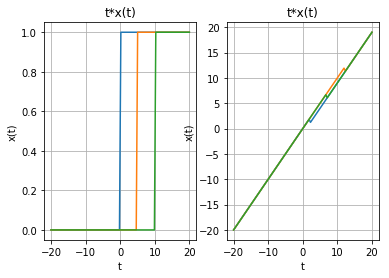

In [8]:
t = np.linspace(-20, 20, 100)
x = lambda t: (t>=0).astype(float)

def Tr(x):
    return lambda t: t - x(t-2)

verifyInvariance(Tr,'t*x(t)')

__Resposta__: O sistema é variante no tempo, pois a variação na saída no primeiro gráfico é diferente do segundo. Assim, a saída varia com o tempo.

invariante


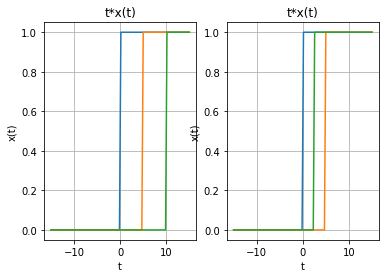

In [9]:
t = np.linspace(-15, 15, 100)
x = lambda t: (t>=0).astype(float)

def Tr(x):
    return lambda t: x(2*t)

verifyInvariance(Tr,'t*x(t)')

__Resposta__: O sistema é invariante no tempo, pois a variação na saída no primeiro gráfico é igual do segundo. Assim, a saída é constante com o tempo.

## Convolução

In [2]:
x,fs = sf.read('audio/ObamaSpeech.wav')

Text(0.5, 1.0, 'Speech Obama')

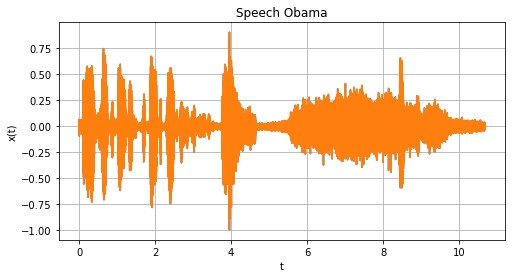

In [38]:

plt.figure(figsize=(8,4))
t = np.arange(len(x)) / fs
plt.plot(t, x)
plt.grid()
plt.xlabel('t')
plt.ylabel('x(t)')   
plt.title("Speech Obama") 

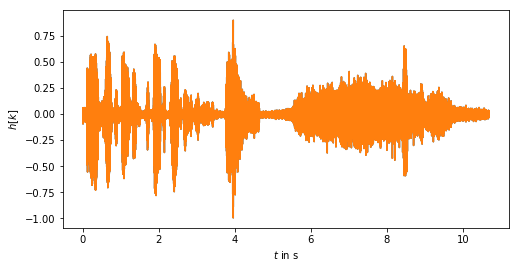

In [37]:

plt.figure(figsize=(8,4))
t = 1/fs*np.arange(len(h))
plt.plot(t, h)
plt.xlabel(r'$t$ in s')
plt.ylabel(r'$h[k]$');

y = max(x) * y / np.max(np.abs(y))
sf.write('wet_source.wav', y, fs)
IPython.display.Audio('wet_source.wav')

x, Fs = sf.read('audio/ObamaSpeech.wav')


atraso = 0.5   
a = 0.85

D = int(delay * Fs)
y = np.zeros(len(x))
y[0:D] = x[0:D]

for i in range(D + 1,len(x)):
    y[i] = x[i] + a* x[i -D]